In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

from dbgsom.dbgsom_ import DBGSOM

## Read and format file

In [2]:
dataset = pd.read_csv("wahlomat_dataset.csv")
dataset = dataset.replace({"stimme zu": 1, "neutral": 0, "stimme nicht zu": -1})

parties = dataset.pivot(
    index="Partei: Kurzbezeichnung", columns="These: Titel", values="Position: Position"
)

statements = dataset.pivot(
    index="These: Titel", columns="Partei: Kurzbezeichnung", values="Position: Position"
)

In [50]:
som = DBGSOM(
    spreading_factor=0.995,
    max_epochs=400,
    metric="cosine",
    random_state=42,
    sigma_end=0.1,
)
som.fit(X=parties)

 39%|███▉      | 156/400 [00:02<00:03, 72.95 epochs/s]


DBGSOM(max_epochs=400, metric='cosine', random_state=42, sigma_end=0.1,
       spreading_factor=0.995)

In [51]:
# plt.figure(figsize=(10, 10))
# labels = ((dict(som.som_.nodes.data("label")).values()))
# p = so.Plot(
#     x=np.array(som.neurons_)[labels, 0],
#     y=np.array(som.neurons_)[labels, 1],
#     text=parties.index
# ).add(so.Text(
#     # color=[[colors[partei] for partei in parteien.index]]
#     ))
# p.save(loc="parties.png")

AttributeError: 'DBGSOM' object has no attribute 'classes_'

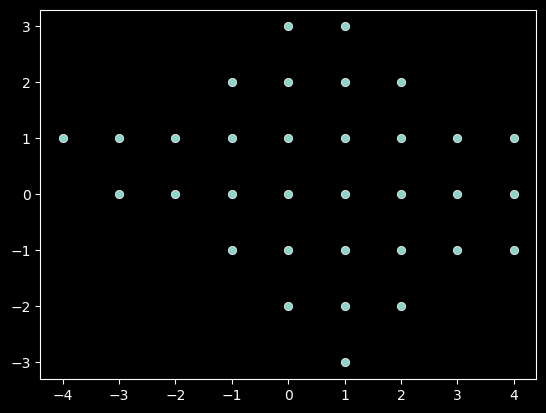

In [53]:
sns.scatterplot(
    x=np.array(som.neurons_)[:, 0],
    y=np.array(som.neurons_)[:, 1],
)

for i, party in enumerate(parties.index):
    plt.text(
        x=np.array(som.neurons_)[i, 0],
        y=np.array(som.neurons_)[i, 1],
        s=som.predict(parties),
        rotation=45,
    )

### Colors for parties
(WiP)

In [ ]:
from collections import defaultdict


def return_grey():
    return "grey"


colors = defaultdict(return_grey)

In [ ]:
colors.update(
    {
        "GRÜNE": "green",
        "SPD": "red",
        "DIE LINKE": "red",
        "FPD": "yellow",
        "CDU/CSU": "black",
        "AfD": "blue",
    }
)